In [8]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

In [ ]:
file_path = r'/Users/lanwang/Downloads/text_training_data.csv'
data = pd.read_csv(file_path)
print(data.head(10))

                                            headline          label
0     MyBook Disk Drive Handles Lots of Easy Backups  not clickbait
1                     CIT Posts Eighth Loss in a Row  not clickbait
2  Candy Carson Singing The "National Anthem" Is ...      clickbait
3  Why You Need To Stop What You're Doing And Dat...      clickbait
4  27 Times Adele Proved She's Actually The Reale...      clickbait
5  29 Times #BlackGirlMagic Was More Than Just A ...      clickbait
6  Scientology ties at New Village Leadership Aca...  not clickbait
7             Judge Allows Asbestos Case to Continue  not clickbait
8            Cities Deal With a Surge in Shantytowns  not clickbait
9              15 Reasons December Is The Best Month      clickbait


### Part A Build a classification model using text data

In [ ]:
print("#1")
headlines = data['headline']
labels = data['label'].map({'not clickbait': 0, 'clickbait': 1})

#1


In [ ]:
print("#2")
# Vectorize the headlines using Bag of Words
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(headlines)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, labels, test_size=0.2, random_state=42)

#2


In [ ]:
print("#3")
# Define the logistic regression model and parameter grid
log_reg = LogisticRegression(max_iter=1000)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Perform grid search
grid_search_bow = GridSearchCV(log_reg, param_grid, scoring='f1', cv=5)
grid_search_bow.fit(X_train_bow, y_train)

# Get the best model
best_log_reg_bow = grid_search_bow.best_estimator_

# Evaluate the model
y_pred_bow = best_log_reg_bow.predict(X_test_bow)
print("F1 Score (Bag of Words):", f1_score(y_test, y_pred_bow))
print("Classification Report (Bag of Words):")
print(classification_report(y_test, y_pred_bow))

#3
F1 Score (Bag of Words): 0.9661835748792271
Classification Report (Bag of Words):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2610
           1       0.97      0.96      0.97      2386

    accuracy                           0.97      4996
   macro avg       0.97      0.97      0.97      4996
weighted avg       0.97      0.97      0.97      4996



### The precision and recall for both classes (0: not clickbait, 1: clickbait) are high and balanced, with an overall weighted F1-score of 0.966. So, the Bag of Words provides a strong performance, indicating that even simple word-level features are effective for this task.

In [ ]:
print("#4")
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(headlines)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, labels, test_size=0.2, random_state=42)
# Perform grid search
grid_search_tfidf = GridSearchCV(log_reg, param_grid, scoring='f1', cv=5)
grid_search_tfidf.fit(X_train_tfidf, y_train)

# Get the best model
best_log_reg_tfidf = grid_search_tfidf.best_estimator_

# Evaluate the model
y_pred_tfidf = best_log_reg_tfidf.predict(X_test_tfidf)
print("F1 Score (TF-IDF):", f1_score(y_test, y_pred_tfidf))
print("Classification Report (TF-IDF):")
print(classification_report(y_test, y_pred_tfidf))

#4
F1 Score (TF-IDF): 0.9676198486122792
Classification Report (TF-IDF):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2610
           1       0.97      0.96      0.97      2386

    accuracy                           0.97      4996
   macro avg       0.97      0.97      0.97      4996
weighted avg       0.97      0.97      0.97      4996



In [ ]:
# Vectorize the headlines using Bag of Words with N-Grams
vectorizer_ngrams = CountVectorizer(ngram_range=(1, 2))
X_ngrams = vectorizer_ngrams.fit_transform(headlines)
X_train_ngrams, X_test_ngrams, y_train, y_test = train_test_split(X_ngrams, labels, test_size=0.2, random_state=42)
grid_search_ngrams = GridSearchCV(log_reg, param_grid, scoring='f1', cv=5)
grid_search_ngrams.fit(X_train_ngrams, y_train)

# Get the best model
best_log_reg_ngrams = grid_search_ngrams.best_estimator_

# Evaluate the model
y_pred_ngrams = best_log_reg_ngrams.predict(X_test_ngrams)
print("F1 Score (N-Grams):", f1_score(y_test, y_pred_ngrams))
print("Classification Report (N-Grams):")
print(classification_report(y_test, y_pred_ngrams))

F1 Score (N-Grams): 0.9674280879864636
Classification Report (N-Grams):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2610
           1       0.98      0.96      0.97      2386

    accuracy                           0.97      4996
   macro avg       0.97      0.97      0.97      4996
weighted avg       0.97      0.97      0.97      4996



In [ ]:
print("#5")
print("F1 Scores:")
print(f"Bag of Words: {f1_score(y_test, y_pred_bow)}")
print(f"TF-IDF: {f1_score(y_test, y_pred_tfidf)}")
print(f"N-Grams: {f1_score(y_test, y_pred_ngrams)}")

#5
F1 Scores:
Bag of Words: 0.9661835748792271
TF-IDF: 0.9676198486122792
N-Grams: 0.9674280879864636


In [ ]:
# Bag of Words Coefficients
coeff_bow = pd.DataFrame({'Feature': vectorizer_bow.get_feature_names_out(),
                          'Coefficient': best_log_reg_bow.coef_[0]})
print(coeff_bow.sort_values(by='Coefficient', ascending=False).head(10))

# TF-IDF Coefficients
coeff_tfidf = pd.DataFrame({'Feature': vectorizer_tfidf.get_feature_names_out(),
                            'Coefficient': best_log_reg_tfidf.coef_[0]})
print(coeff_tfidf.sort_values(by='Coefficient', ascending=False).head(10))

# N-Grams Coefficients
coeff_ngrams = pd.DataFrame({'Feature': vectorizer_ngrams.get_feature_names_out(),
                             'Coefficient': best_log_reg_ngrams.coef_[0]})
print(coeff_ngrams.sort_values(by='Coefficient', ascending=False).head(10))

           Feature  Coefficient
20213          you     7.364586
156           2015     7.053958
2906      buzzfeed     6.980712
19419    victories     6.612317
4066   confessions     6.555387
18250        these     6.445825
20219         your     6.411746
6791      feminist     6.209302
5026      democrat     5.976065
170             21     5.916128
      Feature  Coefficient
20213     you    28.727865
18275    this    20.163887
20219    your    19.853685
18250   these    15.584464
13367  people    13.762453
156      2015    13.613946
170        21    13.488844
8511     here    13.467891
19717      we    13.389424
79         17    12.871407
            Feature  Coefficient
134459          you     6.816581
135028         your     6.455842
29143   confessions     5.895113
117996         this     5.889037
117319        these     5.473512
22013       but not     5.442125
2406             21     5.176035
1212             17     5.034050
2306           2015     5.008276
128768           we  

###  TF-IDF is the best because Bag of Words: 0.966; TF-IDF: 0.968; N-Grams: 0.967.
### Words like "you", "this", "your", and "these" consistently appear as strong predictors across all vectorization methods. These words likely indicate typical clickbait phrasing.
### TF-IDF emphasizes words with higher discriminatory power, such as "people" and "we", by assigning much larger coefficients than the other methods.
### N-Grams captures word combinations like "but not" and "confessions", which might provide additional context for identifying clickbait.

# PART B Build a Predictive Neural Network Using Keras

#### 1

In [9]:
url = "http://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv"
iris = pd.read_csv(url)

# Inspect the first few rows
print(iris.head())

   rownames  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0         1           5.1          3.5           1.4          0.2  setosa
1         2           4.9          3.0           1.4          0.2  setosa
2         3           4.7          3.2           1.3          0.2  setosa
3         4           4.6          3.1           1.5          0.2  setosa
4         5           5.0          3.6           1.4          0.2  setosa


#### 2

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
import tensorflow as tf


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [17]:
# Step 1: Load and prepare the data
iris_data = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv')
display(iris_data.head(10))

,rownames,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
5,6,5.4,3.9,1.7,0.4,setosa
6,7,4.6,3.4,1.4,0.3,setosa
7,8,5.0,3.4,1.5,0.2,setosa
8,9,4.4,2.9,1.4,0.2,setosa
9,10,4.9,3.1,1.5,0.1,setosa


In [18]:

# Feature matrix (X) and target vector (y)
X = iris_data.iloc[:, 0:4].values
y = pd.get_dummies(iris_data['Species']).values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define and train Model 1
print("\nModel 1: 2 hidden layers with 16 neurons each")
model1 = Sequential([
    Dense(16, activation='relu', input_shape=(4,)),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
accuracy1 = model1.evaluate(X_test, y_test, verbose=0)[1]
print(f"Model 1 Test Accuracy: {accuracy1:.3f}")



Model 1: 2 hidden layers with 16 neurons each


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model 1 Test Accuracy: 0.967


In [19]:
print("\nModel 2: 3 hidden layers with 32 neurons each")
model2 = Sequential([
    Dense(32, activation='relu', input_shape=(4,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
accuracy2 = model2.evaluate(X_test, y_test, verbose=0)[1]
print(f"Model 2 Test Accuracy: {accuracy2:.3f}")


Model 2: 3 hidden layers with 32 neurons each
Model 2 Test Accuracy: 1.000


In [20]:
print("\nModel 3: 1 hidden layer with 64 neurons")
model3 = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(3, activation='softmax')
])

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
accuracy3 = model3.evaluate(X_test, y_test, verbose=0)[1]
print(f"Model 3 Test Accuracy: {accuracy3:.3f}")


Model 3: 1 hidden layer with 64 neurons
Model 3 Test Accuracy: 0.900


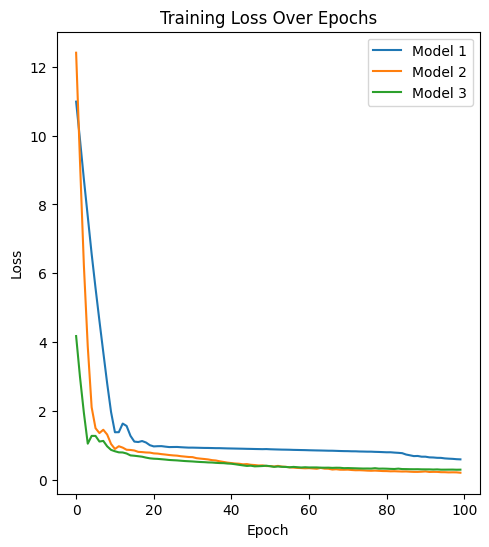

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Training Loss
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Model 1')
plt.plot(history2.history['loss'], label='Model 2')
plt.plot(history3.history['loss'], label='Model 3')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


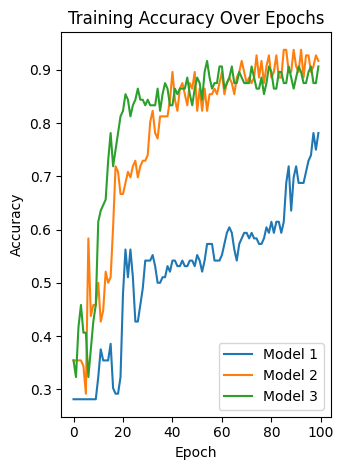

In [23]:
# Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'], label='Model 1')
plt.plot(history2.history['accuracy'], label='Model 2')
plt.plot(history3.history['accuracy'], label='Model 3')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [24]:
print("\nComparison of Test Accuracies:")
print(f"Model 1: {accuracy1:.3f}")
print(f"Model 2: {accuracy2:.3f}")
print(f"Model 3: {accuracy3:.3f}")


Comparison of Test Accuracies:
Model 1: 0.967
Model 2: 1.000
Model 3: 0.900


so model 2 is really perfect,it is the best-performing model. The additional depth (3 layers) and width (32 neurons per layer) allow the model to fully capture the complexity of the dataset. This is particularly effective since the Iris dataset is relatively small and clean, making it easier to fit without overfitting.

Model1 is better than Model3, The reason may because the lack of additional hidden layers may limit its ability to capture complex patterns. This could also indicate that increasing the number of neurons in a single layer doesn't compensate for depth in some cases.
